In [5]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [9]:
os.chdir("/content/drive/MyDrive/disaster/data")
input_path= "/content/drive/MyDrive/disaster/data"

train_another = os.path.join(input_path, "train_another/")
test_another = os.path.join(input_path, "test_another/")
validation_another = os.path.join(input_path, "validation_another/")
test = os.path.join(input_path,"test/")



In [11]:
def print_file_sizes(input_path, subset):
    print('{}:'.format(subset))
    print('')
    path = input_path + subset + '/'
    for f in os.listdir(path):
        if not os.path.isdir(path + f):
            print(f.ljust(30) + str(round(os.path.getsize(path + f) / 1000000, 2)) + 'MB')
        else:
            sizes = [os.path.getsize(path+f+'/'+x)/1000000 for x in os.listdir(path + f)]
            print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))
    print('')
    
print_file_sizes(input_path, '/train_another')
print_file_sizes(input_path, '/validation_another')
print_file_sizes(input_path, '/test_another')
print_file_sizes(input_path, '/test')

/train_another:

no_damage                     6.39MB (2041 files)
damage                        6.06MB (2346 files)

/validation_another:

no_damage                     3.02MB (1000 files)
damage                        2.52MB (1000 files)

/test_another:

no_damage                     3.01MB (1000 files)
damage                        3.45MB (1303 files)

/test:

no_damage                     2.99MB (1000 files)
damage                        2.53MB (1000 files)



In [20]:
image_df = pd.DataFrame({'path': list(Path(input_path).glob('**/*.jp*g'))})

image_df['damage'] = image_df['path'].map(lambda x: x.parent.stem)
image_df['data_split'] = image_df['path'].map(lambda x: x.parent.parent.stem)
image_df['location'] = image_df['path'].map(lambda x: x.stem)
image_df['lon'] = image_df['location'].map(lambda x: float(x.split('_')[0]))
image_df['lat'] = image_df['location'].map(lambda x: float(x.split('_')[-1]))
image_df['path'] = image_df['path'].map(lambda x: str(x)) # convert the path back to a string

display(image_df.iloc[0])

path          /content/drive/MyDrive/disaster/data/test_anot...
damage                                                no_damage
data_split                                         test_another
location                           -95.66588399999999_29.817517
lon                                                    -95.6659
lat                                                     29.8175
Name: 0, dtype: object

In [21]:
df_wind=pd.read_csv('/long_lat_windspeed.csv')
df_wind.head(5)

path  ... wind_speed
0  /content/drive/My Drive/disaster/data/train_an...  ...       43.0
1  /content/drive/My Drive/disaster/data/train_an...  ...       44.0
2  /content/drive/My Drive/disaster/data/train_an...  ...       45.0
3  /content/drive/My Drive/disaster/data/train_an...  ...       52.0
4  /content/drive/My Drive/disaster/data/train_an...  ...       53.0

[5 rows x 7 columns]

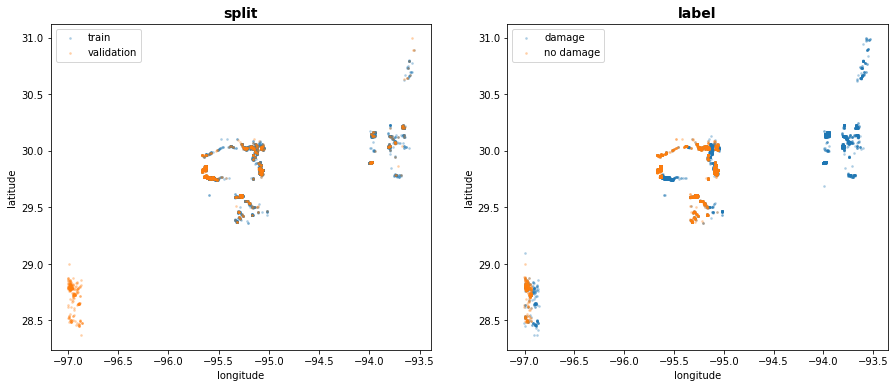

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

s = 3
alpha = 0.25

# get the train-validation-test splits
image_df_train = image_df[image_df['data_split']=='train_another'].copy()
image_df_val = image_df[image_df['data_split']=='validation_another'].copy()
image_df_test = image_df[image_df['data_split']=='test_another'].copy()

image_df_train.sort_values('lat', inplace=True)
image_df_val.sort_values('lat', inplace=True)
image_df_test.sort_values('lat', inplace=True)
image_df_train.reset_index(drop=True,inplace=True)
image_df_val.reset_index(drop=True,inplace=True)
image_df_test.reset_index(drop=True,inplace=True)

ax[0].scatter(image_df_train['lon'], image_df_train['lat'], color='C0', s=s, alpha=alpha, label='train')
ax[0].scatter(image_df_val['lon'], image_df_val['lat'], color='C1', s=s, alpha=alpha, label='validation')

ax[0].set_title('split', fontsize=14, fontweight='bold')
ax[0].legend()
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')

image_df_dmg = image_df[image_df['damage']=='damage'].copy()
image_df_nodmg = image_df[image_df['damage']=='no_damage'].copy()

image_df_dmg.reset_index(drop=True,inplace=True)
image_df_nodmg.reset_index(drop=True,inplace=True)

ax[1].scatter(image_df_dmg['lon'], image_df_dmg['lat'], color='C0', s=s, alpha=alpha, label='damage')
ax[1].scatter(image_df_nodmg['lon'], image_df_nodmg['lat'], color='C1', s=s, alpha=alpha, label='no damage')

ax[1].set_title('label', fontsize=14, fontweight='bold')
ax[1].legend()
ax[1].set_xlabel('longitude')
ax[1].set_ylabel('latitude')

plt.show(fig)

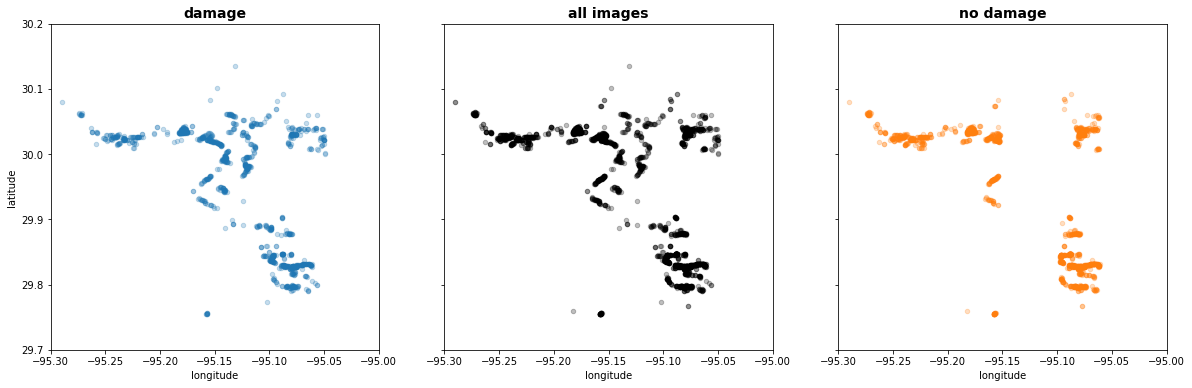

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6), sharex=True, sharey=True)

s = 20
alpha = 0.25

ax[0].scatter(image_df_dmg['lon'], image_df_dmg['lat'], color='C0', s=s, alpha=alpha, label='damage')
ax[0].set_title('damage', fontsize=14, fontweight='bold')

ax[1].scatter(image_df_dmg['lon'], image_df_dmg['lat'], color='k', s=s, alpha=alpha, label='damage')
ax[1].scatter(image_df_nodmg['lon'], image_df_nodmg['lat'], color='k', s=s, alpha=alpha, label='no damage')
ax[1].set_title('all images', fontsize=14, fontweight='bold')

ax[2].scatter(image_df_nodmg['lon'], image_df_nodmg['lat'], color='C1', s=s, alpha=alpha, label='no damage')
ax[2].set_title('no damage', fontsize=14, fontweight='bold')

ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[2].set_xlabel('longitude')

ax[0].set_xlim(-95.3,-95)
ax[0].set_ylim(29.7,30.2)

plt.show(fig)


In [24]:
import cv2

# read it in unchanged, to avoid loss of any information
img = cv2.imread(image_df['path'][0], cv2.IMREAD_UNCHANGED)
np.shape(img)

(128, 128, 3)

In [25]:
type(img[0,0,0])

numpy.uint8

In [26]:
import numpy
numpy.uint8

numpy.uint8

In [27]:
np.min(img[:,:,:])

5

In [28]:
np.max(img[:,:,:])

255

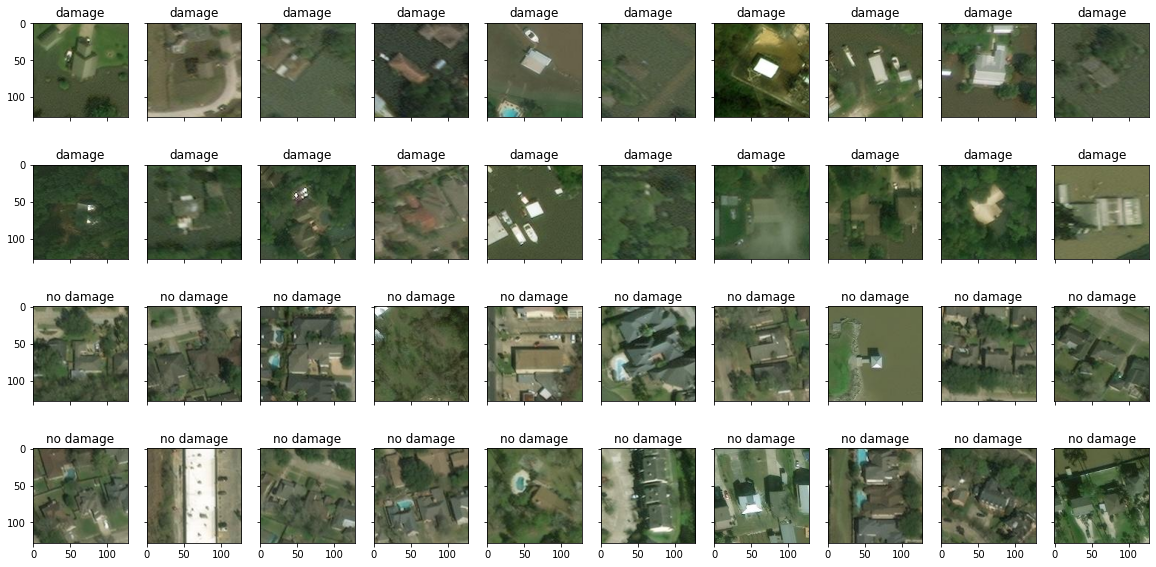

In [29]:
from google. colab. patches import cv2_imshow
fig, ax = plt.subplots(nrows=4, ncols=10, sharex=True, sharey=True, figsize=(20,10))

ax = ax.flatten()

for i in range(20):
    img = cv2.imread(image_df_dmg['path'][i], cv2.IMREAD_UNCHANGED)
    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i].set_title('damage')
    
for i in range(20,40):
    img = cv2.imread(image_df_nodmg['path'][i], cv2.IMREAD_UNCHANGED)
    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i].set_title('no damage')
plt.show()

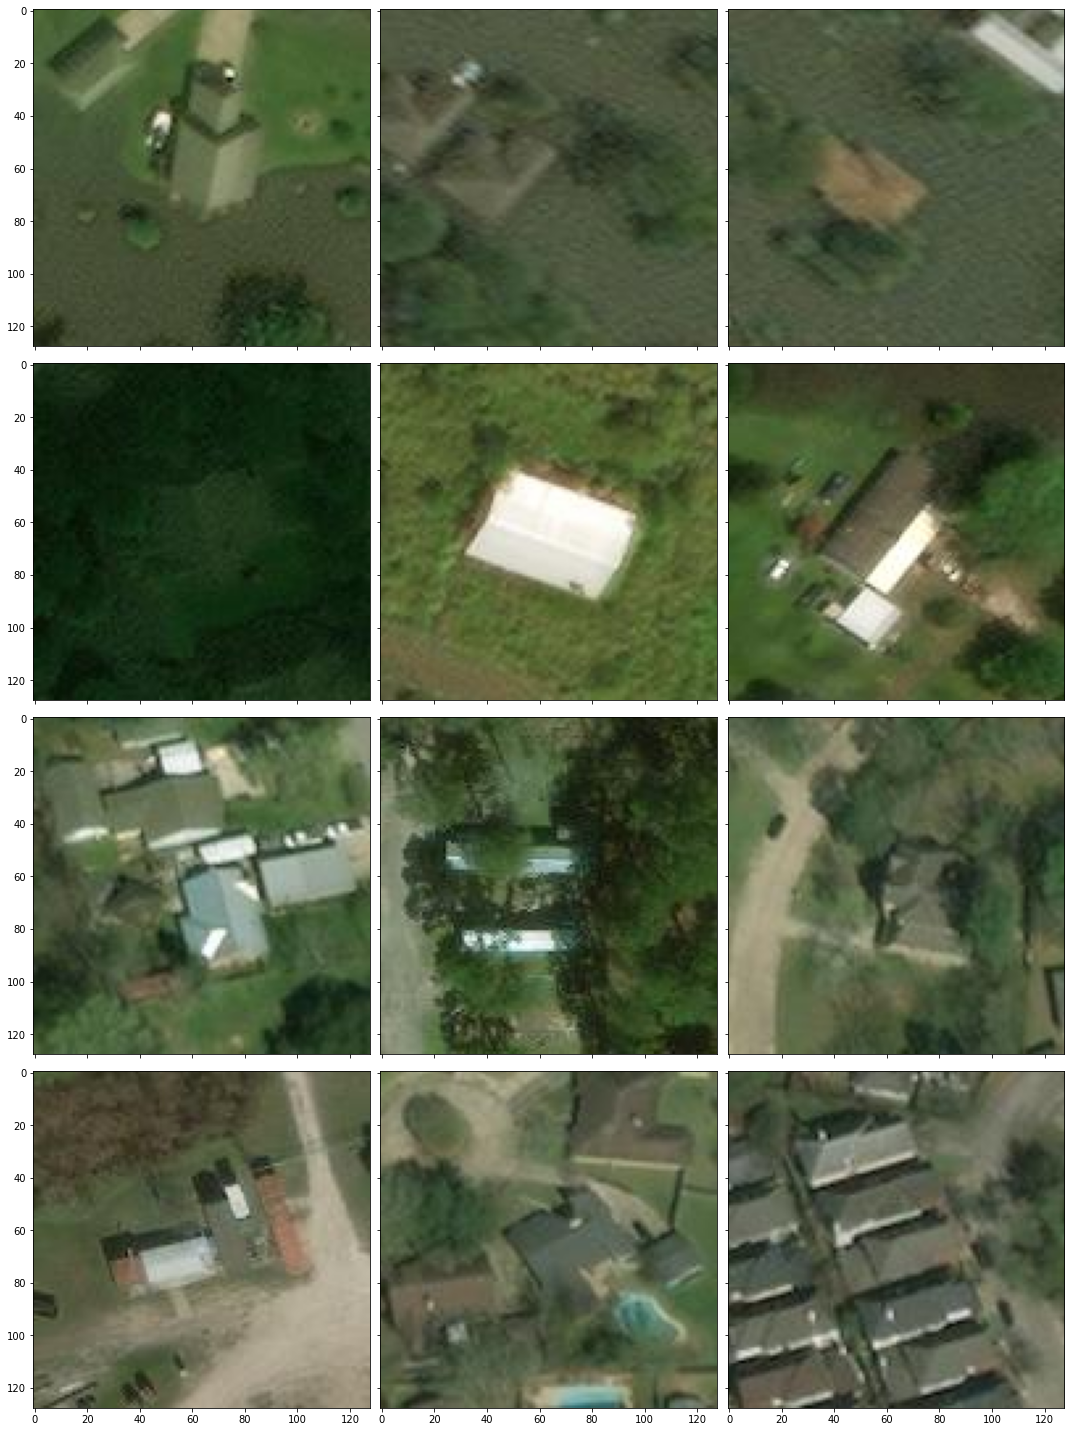

In [30]:
fig, ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True, figsize=(15,20))

ax = ax.flatten()

selected_dmg = np.array([0,1,2,3,4,5])*100
selected_nodmg = np.array([0,1,2,3,4,5])*99

for i in range(6):
    img = cv2.imread(image_df_dmg['path'][selected_dmg[i]], cv2.IMREAD_UNCHANGED)
    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #ax[i].set_title('damage')
    
for i in range(6):
    img = cv2.imread(image_df_nodmg['path'][selected_nodmg[i]], cv2.IMREAD_UNCHANGED)
    ax[i+6].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #ax[i+6].set_title('no damage')
    
fig.tight_layout()
plt.show()

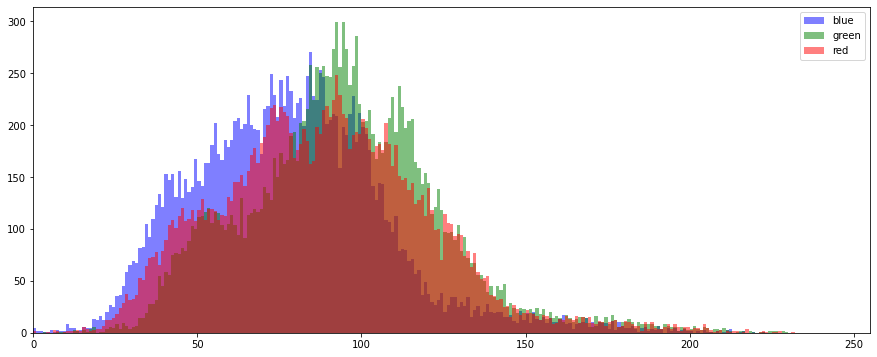

In [31]:
jpg_channels = ['blue','green','red']
jpg_channel_colors = ['b','g','r']

fig, ax = plt.subplots(figsize=(15,6))

for i in range(len(jpg_channels)):
    ax.hist(img[:,:,i].flatten(), bins=np.arange(256),
            label=jpg_channels[i], color=jpg_channel_colors[i], alpha=0.5)
    ax.legend()
    
ax.set_xlim(0,255)
    
plt.show(fig)

In [32]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [33]:
# paths
train_path = image_df_train['path'].copy().values
val_path = image_df_val['path'].copy().values
test_path = image_df_test['path'].copy().values

# labels
train_labels = np.zeros(len(image_df_train), dtype=np.int8)
train_labels[image_df_train['damage'].values=='damage'] = 1

val_labels = np.zeros(len(image_df_val), dtype=np.int8)
val_labels[image_df_val['damage'].values=='damage'] = 1

test_labels = np.zeros(len(image_df_test), dtype=np.int8)
test_labels[image_df_test['damage'].values=='damage'] = 1

In [34]:
train_ds = tf.data.Dataset.from_tensor_slices((train_path, train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_path, val_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_path, test_labels))

# note that the `numpy()` function is required to grab the actual values from the Dataset
for path, label in train_ds.take(5):
    print("path  : ", path.numpy().decode('utf-8'))
    print("label : ", label.numpy())

path  :  /content/drive/MyDrive/disaster/data/train_another/no_damage/-95.212422_29.364906.jpeg
label :  0
path  :  /content/drive/MyDrive/disaster/data/train_another/damage/-95.212422_29.364906.jpeg
label :  1
path  :  /content/drive/MyDrive/disaster/data/train_another/damage/-95.319525_29.372438.jpeg
label :  1
path  :  /content/drive/MyDrive/disaster/data/train_another/no_damage/-95.319525_29.372438.jpeg
label :  0
path  :  /content/drive/MyDrive/disaster/data/train_another/no_damage/-95.319091_29.372690999999996.jpeg
label :  0


In [35]:
def cv2_imread(path, label):
    img = cv2.imread(path.numpy().decode('utf-8'), cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img, label

def tf_cleanup(img, label):
    # convert to Tensor
    img = tf.convert_to_tensor(img)
    img = tf.dtypes.cast(img, tf.uint8)
    img.set_shape((128, 128, 3))
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [128, 128])
    label = tf.convert_to_tensor(label)
    label.set_shape(())
    return img, label

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.map(lambda path, label: tuple(tf.py_function(cv2_imread, [path, label], [tf.uint16, label.dtype])),
                        num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(lambda path, label: tuple(tf.py_function(cv2_imread, [path, label], [tf.uint16, label.dtype])),
                    num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(lambda path, label: tuple(tf.py_function(cv2_imread, [path, label], [tf.uint16, label.dtype])),
                      num_parallel_calls=AUTOTUNE)

train_ds = train_ds.map(tf_cleanup, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(tf_cleanup, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(tf_cleanup, num_parallel_calls=AUTOTUNE)


In [36]:
def rotate_augmentation(img, label):
    img = tf.image.rot90(img, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32, seed=1111))
    return img, label

def flip_augmentation(img, label):
    img = tf.image.random_flip_left_right(img, seed=2222)
    img = tf.image.random_flip_up_down(img, seed=3333)
    return img, label

augmented_train_ds = train_ds.map(rotate_augmentation, num_parallel_calls=AUTOTUNE)
augmented_train_ds = augmented_train_ds.map(flip_augmentation, num_parallel_calls=AUTOTUNE)

augmented_val_ds = val_ds.map(rotate_augmentation, num_parallel_calls=AUTOTUNE)
augmented_val_ds = augmented_val_ds.map(flip_augmentation, num_parallel_calls=AUTOTUNE)

train_ds = train_ds.concatenate(augmented_train_ds)
val_ds = val_ds.concatenate(augmented_val_ds)


In [37]:
n_train = len(train_labels)*2
n_val = len(val_labels)*2
n_test = len(test_labels)

train_ds = train_ds.shuffle(n_train, seed=208, reshuffle_each_iteration=True)
val_ds = val_ds.shuffle(n_val, seed=208, reshuffle_each_iteration=True)
test_ds = test_ds.shuffle(n_test, seed=208, reshuffle_each_iteration=True)

In [38]:
n_train_check = 0
for element in train_ds:
    n_train_check = n_train_check + 1
print(n_train_check)

8770


In [39]:
n_val_check = 0
for element in val_ds:
    n_val_check = n_val_check + 1
print(n_val_check)

4000


In [40]:
n_test_check = 0
for element in test_ds:
    n_test_check = n_test_check + 1
print(n_test_check)

2302


In [41]:
for image, label in train_ds.take(1):
    print("image shape : ", image.numpy().shape)
    print("label       : ", label.numpy())

image shape :  (128, 128, 3)
label       :  1


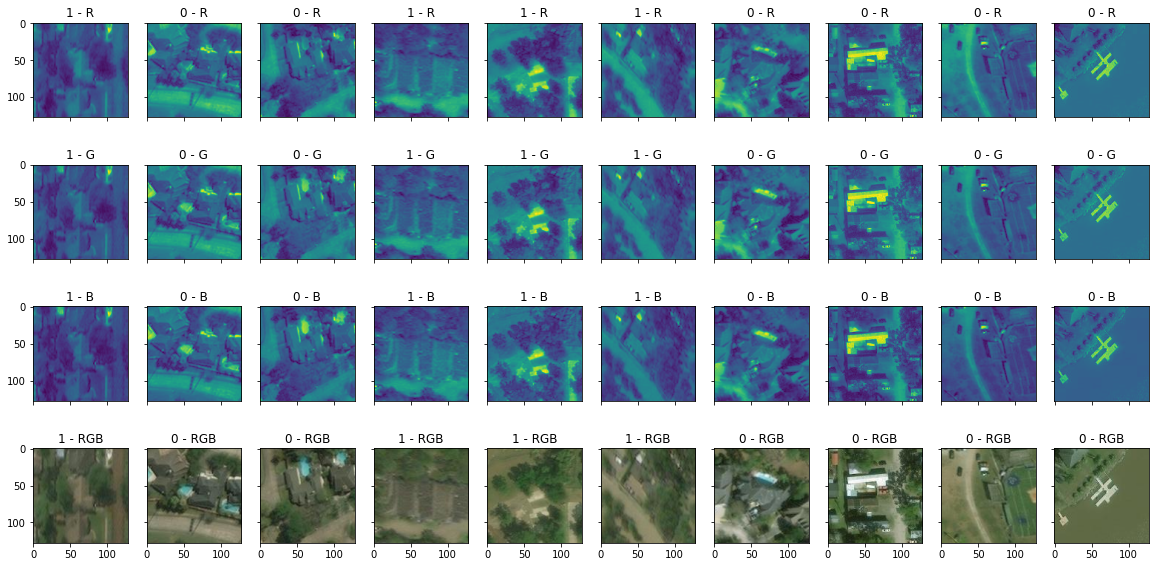

In [42]:
fig, ax = plt.subplots(nrows=4, ncols=10, sharex=True, sharey=True, figsize=(20,10))

i = 0

for image, label in train_ds.take(10):
    ax[0,i].imshow(image[:,:,0])
    ax[0,i].set_title('{} - {}'.format(label.numpy(), 'R'))
    ax[1,i].imshow(image[:,:,1])
    ax[1,i].set_title('{} - {}'.format(label.numpy(), 'G'))
    ax[2,i].imshow(image[:,:,2])
    ax[2,i].set_title('{} - {}'.format(label.numpy(), 'B'))
    ax[3,i].imshow(image)
    ax[3,i].set_title('{} - {}'.format(label.numpy(), 'RGB'))
    
    i = i+1

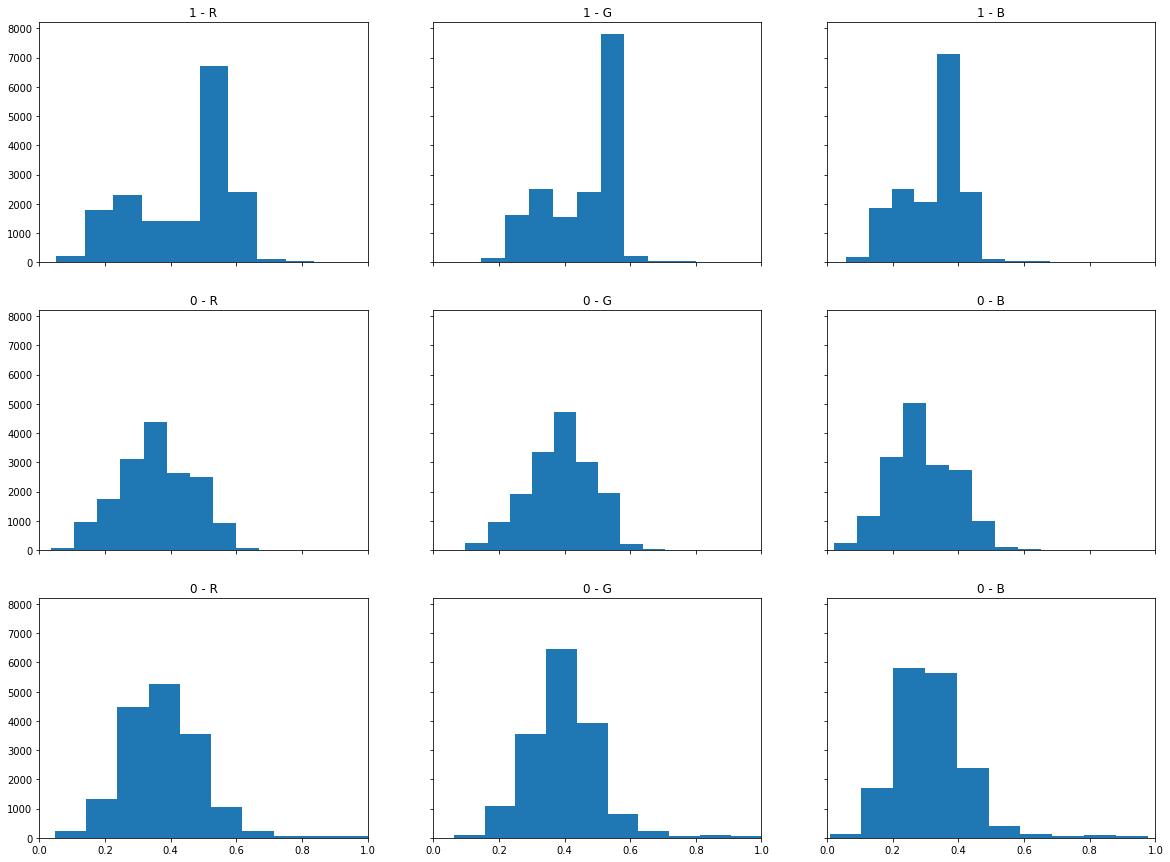

In [43]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(20,15))

ax[0,0].set_xlim(0,1)

i = 0

for image, label in train_ds.take(3):
    ax[i,0].hist(image[:,:,0].numpy().flatten())
    ax[i,0].set_title('{} - {}'.format(label.numpy(), 'R'))
    ax[i,1].hist(image[:,:,1].numpy().flatten())
    ax[i,1].set_title('{} - {}'.format(label.numpy(), 'G'))
    ax[i,2].hist(image[:,:,2].numpy().flatten())
    ax[i,2].set_title('{} - {}'.format(label.numpy(), 'B'))
    
    i = i+1

In [44]:
BATCH_SIZE = 32

train_batches_ds = train_ds.batch(BATCH_SIZE)
val_batches_ds = val_ds.batch(BATCH_SIZE)
test_batches_ds = test_ds.batch(BATCH_SIZE)

In [45]:
for image_batch, label_batch in train_batches_ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 128, 128, 3)
[0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1]


In [46]:
IMG_SHAPE = (128, 128, 3)

pretrained_model = tf.keras.applications.vgg16.VGG16(input_shape=IMG_SHAPE,
                                                     include_top=False,
                                                     weights='imagenet')

pretrained_model.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [47]:
feature_batch = pretrained_model(image_batch)
print(feature_batch.shape)

(32, 4, 4, 512)


In [48]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [49]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [50]:
prediction_layer = tf.keras.layers.Dense(1,
                                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=1992),
                                         bias_initializer=tf.keras.initializers.GlorotUniform(seed=1992))

prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [51]:
model = tf.keras.Sequential([pretrained_model,
                             global_average_layer,
                             prediction_layer])

In [52]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [58]:
initial_epochs = 4
steps_per_epoch = n_train//BATCH_SIZE
validation_steps = 30
# validation_steps = 10

loss0, accuracy0 = model.evaluate(val_batches_ds, steps=validation_steps)

30/30 [==============================] - 164s 5s/step - loss: 0.8690 - accuracy: 0.4979


In [59]:
history = model.fit(train_batches_ds,
                    epochs=initial_epochs,
                    validation_data=val_batches_ds,
                    validation_steps=validation_steps)

Epoch 1/4
275/275 [==============================] - 1607s 6s/step - loss: 0.6891 - accuracy: 0.6044 - val_loss: 0.6470 - val_accuracy: 0.5667
Epoch 2/4
275/275 [==============================] - 1587s 6s/step - loss: 0.6074 - accuracy: 0.5279 - val_loss: 0.6002 - val_accuracy: 0.6062
Epoch 3/4
275/275 [==============================] - 1581s 6s/step - loss: 0.5669 - accuracy: 0.6466 - val_loss: 0.5637 - val_accuracy: 0.7042
Epoch 4/4
275/275 [==============================] - 1584s 6s/step - loss: 0.5318 - accuracy: 0.7350 - val_loss: 0.5304 - val_accuracy: 0.7479


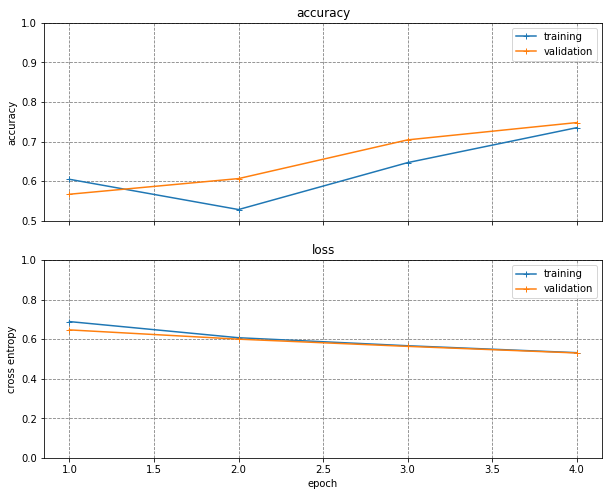

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss'] 
val_loss = history.history['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)

x_plot = np.arange(1, initial_epochs+1)

ax[0].plot(x_plot, acc, '+-', label='training')
ax[0].plot(x_plot, val_acc, '+-', label='validation')
ax[0].legend()
ax[0].set_ylabel('accuracy')
ax[0].set_ylim(0.5, 1)
ax[0].grid(ls='--', c='C7')
ax[0].set_title('accuracy')

ax[1].plot(x_plot, loss, '+-', label='training')
ax[1].plot(x_plot, val_loss, '+-', label='validation')
ax[1].legend()
ax[1].set_ylabel('cross entropy')
ax[1].set_ylim(0, 1)
ax[1].grid(ls='--', c='C7')
ax[1].set_title('loss')
ax[1].set_xlabel('epoch')

plt.show()


In [61]:
pretrained_model.trainable = True

print("Number of layers in the pre-trained model: ", len(pretrained_model.layers))

Number of layers in the pre-trained model:  19


In [62]:
fine_tune_at = 15

for layer in pretrained_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [63]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate/75),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 14,715,201
Trainable params: 7,079,937
Non-trainable params: 7,635,264
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [67]:
# fine_tune_epochs = 50
fine_tune_epochs=6
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1]+1,
                         validation_data=val_batches_ds,
                         validation_steps=validation_steps)

Epoch 5/10
275/275 [==============================] - 1918s 7s/step - loss: 0.2260 - accuracy: 0.9096 - val_loss: 0.2683 - val_accuracy: 0.8781
Epoch 6/10
275/275 [==============================] - 1930s 7s/step - loss: 0.1824 - accuracy: 0.9318 - val_loss: 0.2684 - val_accuracy: 0.9052
Epoch 7/10
275/275 [==============================] - 1923s 7s/step - loss: 0.1535 - accuracy: 0.9440 - val_loss: 0.1943 - val_accuracy: 0.9271
Epoch 8/10
275/275 [==============================] - 1927s 7s/step - loss: 0.1341 - accuracy: 0.9517 - val_loss: 0.2169 - val_accuracy: 0.9115
Epoch 9/10
275/275 [==============================] - 1934s 7s/step - loss: 0.1202 - accuracy: 0.9554 - val_loss: 0.2135 - val_accuracy: 0.9219
Epoch 10/10
275/275 [==============================] - 1926s 7s/step - loss: 0.1086 - accuracy: 0.9608 - val_loss: 0.2404 - val_accuracy: 0.9198


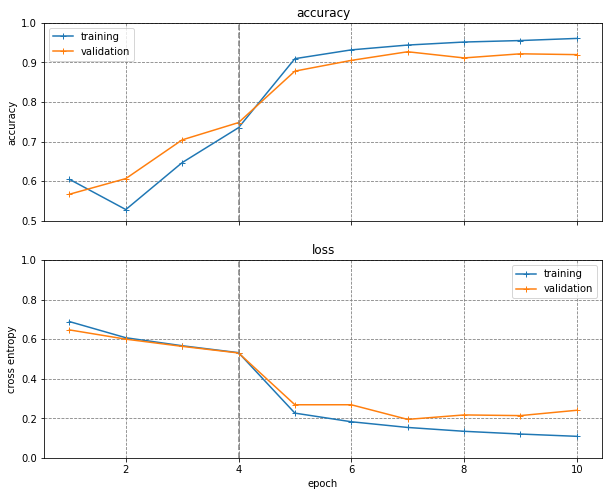

In [68]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)

x_plot = np.arange(1, total_epochs+1)

ax[0].plot(x_plot, acc, '+-', label='training')
ax[0].plot(x_plot, val_acc, '+-', label='validation')
ax[0].legend()
ax[0].set_ylabel('accuracy')
ax[0].set_ylim(0.5, 1)
ax[0].grid(ls='--', c='C7')
ax[0].set_title('accuracy')
ax[0].axvline(initial_epochs, c='C7', ls='--')

ax[1].plot(x_plot, loss, '+-', label='training')
ax[1].plot(x_plot, val_loss, '+-', label='validation')
ax[1].legend()
ax[1].set_ylabel('cross entropy')
ax[1].set_ylim(0, 1)
ax[1].grid(ls='--', c='C7')
ax[1].set_title('loss')
ax[1].set_xlabel('epoch')
ax[1].axvline(initial_epochs, c='C7', ls='--')

plt.show()

In [69]:
val_loss, val_accuracy = model.evaluate(val_batches_ds)

125/125 [==============================] - 649s 5s/step - loss: 0.2340 - accuracy: 0.9200


In [70]:
test_loss, test_accuracy = model.evaluate(test_batches_ds)

72/72 [==============================] - 375s 5s/step - loss: 0.1643 - accuracy: 0.9492


In [73]:
eval_labels = np.array([])
eval_predictions = np.array([])
first = True
for images, labels in test_batches_ds.take(-1):
    if first:
        eval_images = images.numpy()
        first = False
    else:
        eval_images = np.concatenate((eval_images, images.numpy()), axis=0)
    eval_labels = np.append(eval_labels, labels.numpy())
    eval_predictions = np.append(eval_predictions, model.predict_on_batch(images))
    
eval_predictions[eval_predictions>=0] = 1
eval_predictions[eval_predictions<0] = 0

eval_predictions = eval_predictions.astype(int)
eval_labels = eval_labels.astype(int)

print("eval_images      : ", eval_images.shape)
print("eval_labels      : ", eval_labels.shape)
print("eval_predictions : ", eval_predictions.shape)

eval_images      :  (2302, 128, 128, 3)
eval_labels      :  (2302,)
eval_predictions :  (2302,)


In [74]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(eval_labels, eval_predictions)
confusion_mtx

array([[ 895,  105],
       [  26, 1276]])

In [134]:
from sklearn.metrics import f1_score

TN = confusion_mtx[0,0]
FN = confusion_mtx[1,0]
TP = confusion_mtx[1,1]
FP = confusion_mtx[0,1]
F1 = f1_score(eval_labels, eval_predictions)

print('accuracy = {:.4f} %'.format((TP+TN)/np.sum(confusion_mtx)*100))
print('positive recall = {:.4f}'.format(TP/(TP+FN)))
print('negative recall = {:.4f}'.format(TN/(TN+FP)))
print('positive precision = {:.4f}'.format(TP/(TP+FP)))
print('negative precision = {:.4f}'.format(TN/(TN+FN)))

accuracy = 94.3093 %
positive recall = 0.9800
negative recall = 0.8950
positive precision = 0.9240
negative precision = 0.9718


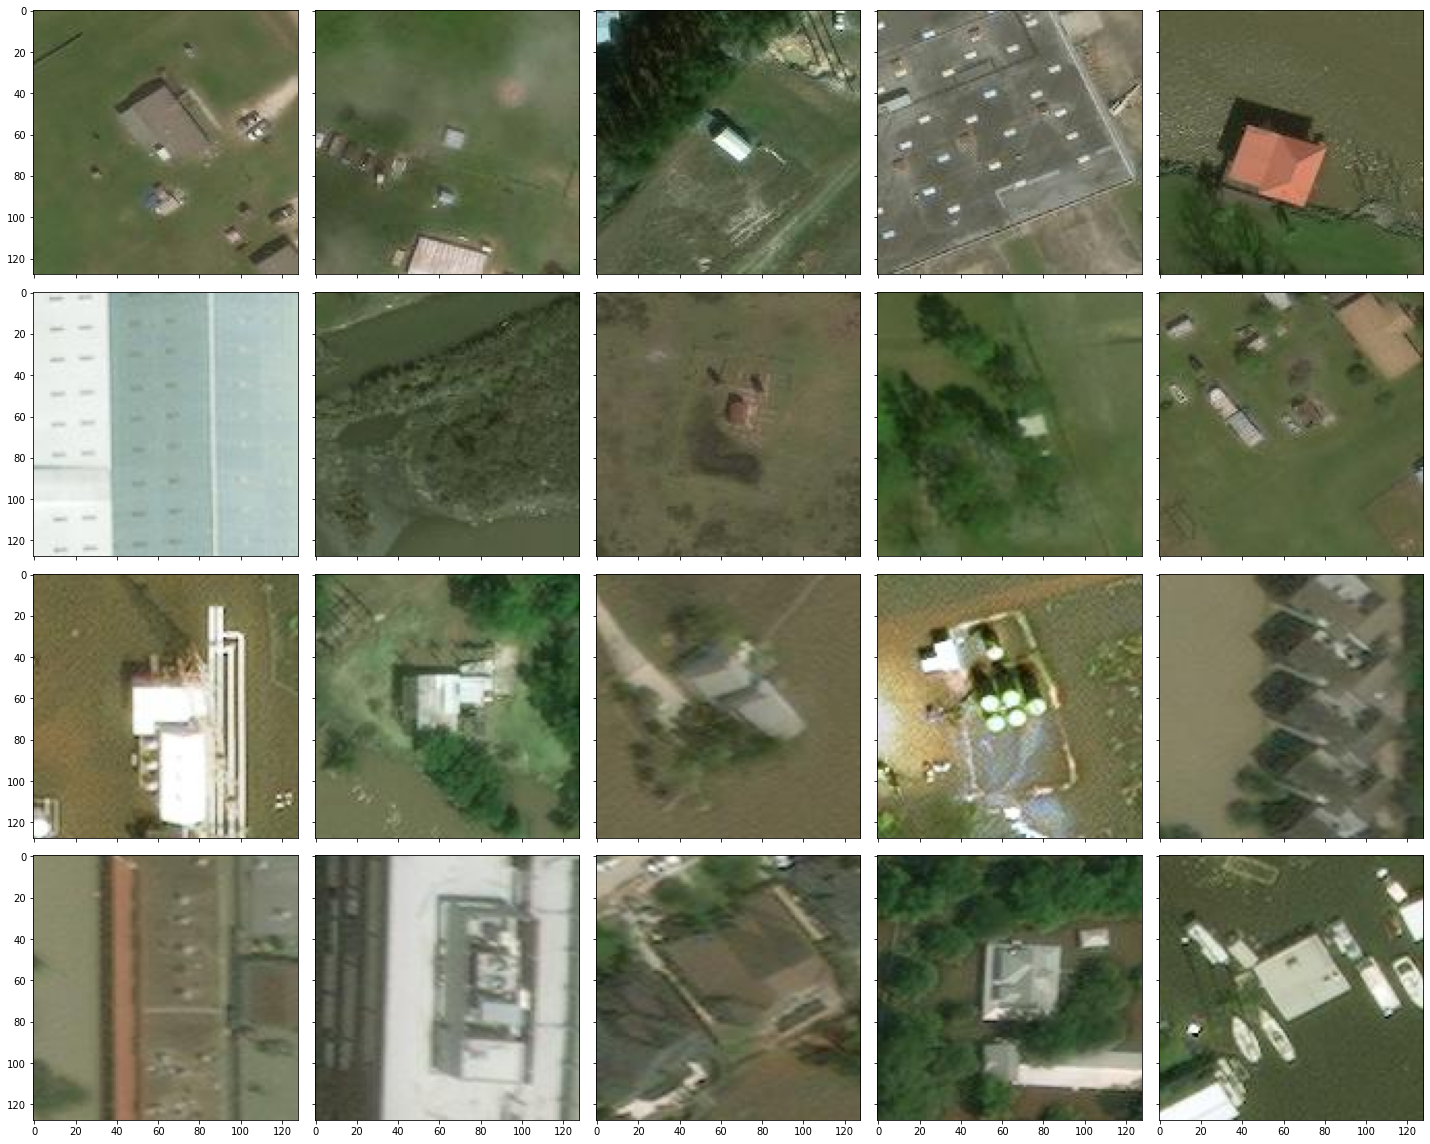

In [77]:
FP_eval_images = eval_images[(eval_labels==0)&(eval_predictions==1)]
FN_eval_images = eval_images[(eval_labels==1)&(eval_predictions==0)]

selected_FP = np.arange(10, dtype=int)*2
selected_FN = np.arange(10, dtype=int)*2

fig, ax = plt.subplots(nrows=4, ncols=5, sharex=True, sharey=True, figsize=(20,16))

ax = ax.flatten()

for i in range(10):
    ax[i].imshow(FP_eval_images[selected_FP[i]])
    
for i in range(10):
    ax[i+10].imshow(FN_eval_images[selected_FN[i]])
    
fig.tight_layout()
plt.show()


In [85]:
df_wind.head(5)

path  ... wind_speed
0  /content/drive/My Drive/disaster/data/train_an...  ...       43.0
1  /content/drive/My Drive/disaster/data/train_an...  ...       44.0
2  /content/drive/My Drive/disaster/data/train_an...  ...       45.0
3  /content/drive/My Drive/disaster/data/train_an...  ...       52.0
4  /content/drive/My Drive/disaster/data/train_an...  ...       53.0

[5 rows x 7 columns]

In [94]:
df1_wind=df_wind.drop(df_wind.index[2302:])
df1_wind.head()

path  ... wind_speed
0  /content/drive/My Drive/disaster/data/train_an...  ...       43.0
1  /content/drive/My Drive/disaster/data/train_an...  ...       44.0
2  /content/drive/My Drive/disaster/data/train_an...  ...       45.0
3  /content/drive/My Drive/disaster/data/train_an...  ...       52.0
4  /content/drive/My Drive/disaster/data/train_an...  ...       53.0

[5 rows x 7 columns]

In [95]:
df1_wind.shape

(2302, 7)

In [97]:
ws_test_true = df1_wind['wind_speed'].values
ws_test_preds = model.predict_generator(test_batches_ds)
ws_test_preds = ws_test_preds.reshape(-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [98]:
ws_test_true.shape

(2302,)

In [99]:
ws_test_preds.shape

(2302,)

Text(0.5, 1.0, 'Distribution of Wind Speeds')

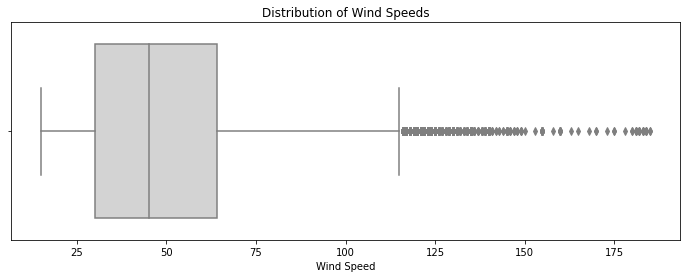

In [107]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_wind.wind_speed, color="lightgray")
plt.xlabel("Wind Speed")
plt.title("Distribution of Wind Speeds")

In [104]:
import sklearn.metrics as metrics
print('Test set\'s RMSE: {}'.format(metrics.mean_squared_error(ws_test_true, ws_test_preds, squared=False)))

Test set's RMSE: 39.17053201110813


In [110]:
df1_wind.wind_speed.describe()

count    2302.000000
mean       37.256299
std        13.128370
min        15.000000
25%        26.000000
50%        35.000000
75%        46.000000
max        95.000000
Name: wind_speed, dtype: float64

In [112]:
df1_wind.describe

<bound method NDFrame.describe of                                                    path  ... wind_speed
0     /content/drive/My Drive/disaster/data/train_an...  ...       43.0
1     /content/drive/My Drive/disaster/data/train_an...  ...       44.0
2     /content/drive/My Drive/disaster/data/train_an...  ...       45.0
3     /content/drive/My Drive/disaster/data/train_an...  ...       52.0
4     /content/drive/My Drive/disaster/data/train_an...  ...       53.0
...                                                 ...  ...        ...
2297  /content/drive/My Drive/disaster/data/train_an...  ...       52.0
2298  /content/drive/My Drive/disaster/data/train_an...  ...       51.0
2299  /content/drive/My Drive/disaster/data/train_an...  ...       51.0
2300  /content/drive/My Drive/disaster/data/train_an...  ...       50.0
2301  /content/drive/My Drive/disaster/data/train_an...  ...       50.0

[2302 rows x 7 columns]>

In [127]:
wind= df1_wind['wind_speed']
L=[]
for i in range (2302):
  if (wind.values[i]<40):
    L.append("Low")
  elif (wind.values[i]>40 and wind.values[i]<50):
    L.append("Med")
  else:
    L.append("High")
    

In [129]:
df1_wind["Severity"]=L

In [137]:
df1_wind.head(10)

path  ... Severity
0  /content/drive/My Drive/disaster/data/train_an...  ...      Med
1  /content/drive/My Drive/disaster/data/train_an...  ...      Med
2  /content/drive/My Drive/disaster/data/train_an...  ...      Med
3  /content/drive/My Drive/disaster/data/train_an...  ...     High
4  /content/drive/My Drive/disaster/data/train_an...  ...     High
5  /content/drive/My Drive/disaster/data/train_an...  ...     High
6  /content/drive/My Drive/disaster/data/train_an...  ...     High
7  /content/drive/My Drive/disaster/data/train_an...  ...     High
8  /content/drive/My Drive/disaster/data/train_an...  ...     High
9  /content/drive/My Drive/disaster/data/train_an...  ...     High

[10 rows x 8 columns]

In [141]:
df1_wind.to_csv("severity.csv",index=False)